
# Proyecto Final – Parte I – Data Science 1 (Coderhouse)

**Alumno:** Tobias Villarruel  
**Dataset:** *Air Quality (UCI)*  
**Archivo:** `ProyectoDSParteI_Villarruel.ipynb`

---

## Abstract

El presente trabajo analiza mediciones de calidad del aire registradas por una estación de monitoreo ubicada en Italia, a partir del dataset **Air Quality (UCI)**. El conjunto de datos contiene series temporales con concentraciones horarias de gases contaminantes **CO(GT)**, **NOx(GT)**, **NO2(GT)** y **C6H6(GT)**, además de variables meteorológicas como **temperatura (T)**, **humedad relativa (RH)** y **humedad absoluta (AH)**. El objetivo es realizar un diagnóstico descriptivo que permita comprender la dinámica de la contaminación y su relación con condiciones atmosféricas.

Metodológicamente, se implementan procedimientos de carga y limpieza que contemplan particularidades del archivo (separador `;`, coma decimal `,` y codificación de faltantes con `-200`). Se construye una columna temporal cuando hay información de **fecha** y **hora**, y se verifican las dimensiones del dataset, tipos de datos y presencia de valores perdidos. A continuación, se desarrollan visualizaciones **univariadas, bivariadas y multivariadas**, junto con resúmenes numéricos. Estas representaciones buscan responder preguntas guía e hipótesis iniciales sobre el comportamiento de variables clave.

Entre los hallazgos esperados, se evalúan patrones de co‑movimiento entre **NOx(GT)** y **NO2(GT)**, la relación entre **temperatura** y ciertos contaminantes, y el rol de la **humedad** en la dispersión o acumulación de gases. Los resultados ofrecen una base empírica para formular hipótesis y orientar análisis posteriores (por ejemplo, modelos predictivos o segmentación temporal), con implicancias para la **salud pública** y la **gestión ambiental urbana**.



## Preguntas e hipótesis de interés

**Preguntas**  
1. ¿Cómo se distribuyen los niveles de los principales contaminantes (CO, NOx, NO2, C6H6)?  
2. ¿Existe relación entre la **temperatura (T)** y los contaminantes **CO(GT)** y **C6H6(GT)**?  
3. ¿Qué tan asociadas están las concentraciones de **NOx(GT)** y **NO2(GT)**?  
4. ¿La **humedad** (RH/AH) se vincula con mayores o menores concentraciones de contaminantes?  

**Hipótesis**  
- **H1.** A mayor temperatura (T), tienden a disminuir las concentraciones de CO(GT).  
- **H2.** NOx(GT) y NO2(GT) presentan **correlación positiva**.  
- **H3.** En condiciones de **mayor humedad**, los contaminantes muestran menor concentración promedio.



## Carga de datos y preparación

- Lectura directa desde GitHub (URL *raw*).  
- Separador `;` y coma decimal `,`.  
- Reemplazo de `-200` por `NaN` (faltantes declarados por el dataset).  
- Normalización de nombres de columnas y construcción de `Datetime` si hay `Date` y `Time`.


In [22]:
import pandas as pd
import numpy as np

# URL de tu archivo en GitHub
url = "https://raw.githubusercontent.com/tobyvillarruelsoto-droid/Data-Science-1/main/Data%20Science%201%20Villarruel/data/raw/air_quality.csv"

# Leer con separador y codificación correctos
df = pd.read_csv(url, sep=";", encoding="latin1")

# Eliminar columnas vacías o sobrantes
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Reemplazar valores faltantes codificados como -200
df = df.replace(-200, np.nan)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# 🔹 Normalizar columnas Date y Time
df["Date"] = df["Date"].astype(str).str.strip()
df["Time"] = df["Time"].astype(str).str.strip()

# En algunos archivos, la hora viene con puntos (e.g. '18.00.00') → reemplazamos por ':'
df["Time"] = df["Time"].str.replace(".", ":", regex=False)

# Crear la columna Datetime con formato día/mes/año hora:minuto:segundo
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

# 🔹 Convertir todas las columnas numéricas (salvo Date/Time/Datetime)
cols_to_convert = [c for c in df.columns if c not in ["Date", "Time", "Datetime"]]
for c in cols_to_convert:
    df[c] = (
        df[c]
        .astype(str)
        .str.replace(",", ".")
        .str.replace(" ", "")
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")

print(df.info())
df.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9471 non-null   object        
 1   Time           9471 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Datetime       9357 n

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00



## Identificación de valores perdidos


In [23]:

na_table = df.isna().sum().sort_values(ascending=False).to_frame("faltantes")
na_table.head(12)

,faltantes
NMHC(GT),8557
NO2(GT),1756
NOx(GT),1753
PT08.S1(CO),480
PT08.S5(O3),480
PT08.S4(NO2),480
PT08.S3(NOx),480
PT08.S2(NMHC),480
T,114
RH,114



**Diagnóstico:** Hay faltantes principalmente en columnas de sensores con `-200` (ya tratados). Para etapas posteriores se recomienda imputación (p. ej., mediana) o eliminación condicionada según proporción de faltantes.



## Resúmenes numéricos


In [24]:

df.select_dtypes(include=["number"]).describe().T.head(12)

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6,1.5,2.6,11.9
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0,937.0,1063.0,1231.0,2040.0
NMHC(GT),914.0,218.811816,204.459921,7.0,67.0,150.0,297.0,1189.0
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0,7.9,13.6,63.7
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0,734.5,909.0,1116.0,2214.0
NOx(GT),7718.0,246.896735,212.979168,2.0,98.0,180.0,326.0,1479.0
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0,658.0,806.0,969.5,2683.0
NO2(GT),7715.0,113.091251,48.370108,2.0,78.0,109.0,142.0,340.0
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0,1227.0,1463.0,1674.0,2775.0
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0,731.5,963.0,1273.5,2523.0



## Visualizaciones univariadas (Matplotlib)


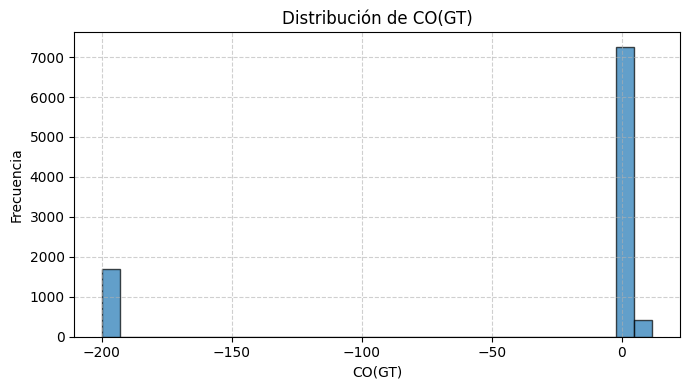

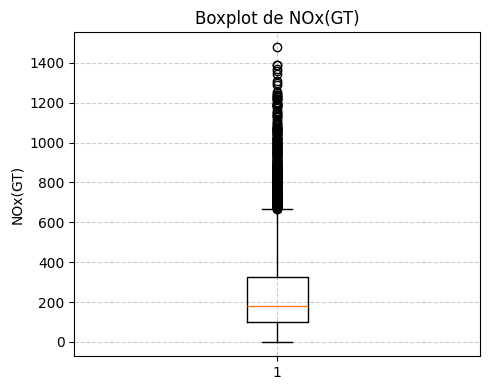

In [25]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df["CO(GT)"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribución de CO(GT)")
plt.xlabel("CO(GT)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
plt.boxplot(df["NOx(GT)"].dropna(), vert=True, showfliers=True)
plt.title("Boxplot de NOx(GT)")
plt.ylabel("NOx(GT)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**Interpretación:** CO(GT) presenta concentración de valores bajos con cola derecha. En NOx(GT) se observan outliers que sugieren episodios puntuales de mayor emisión.



## Visualizaciones bivariadas


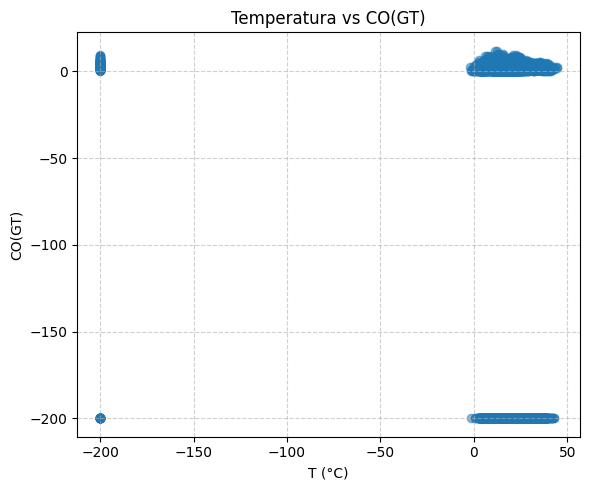

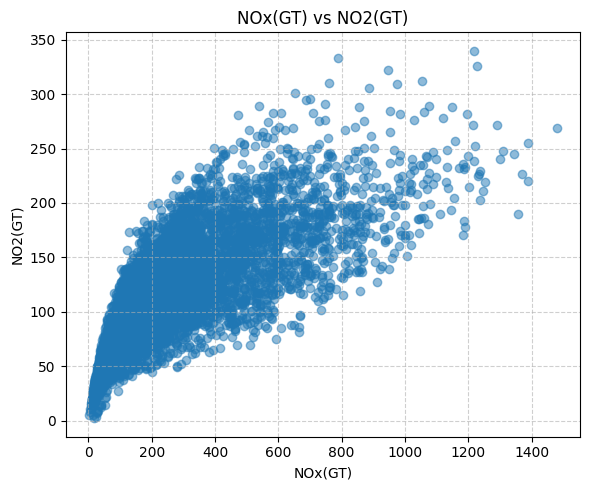

In [26]:

plt.figure(figsize=(6,5))
plt.scatter(df["T"], df["CO(GT)"], alpha=0.5)
plt.title("Temperatura vs CO(GT)")
plt.xlabel("T (°C)")
plt.ylabel("CO(GT)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df["NOx(GT)"], df["NO2(GT)"], alpha=0.5)
plt.title("NOx(GT) vs NO2(GT)")
plt.xlabel("NOx(GT)")
plt.ylabel("NO2(GT)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**Interpretación:** T y CO(GT) presentan relación negativa débil (H1). NOx–NO2 muestran relación positiva consistente (H2).



## Visualizaciones multivariadas (Seaborn)


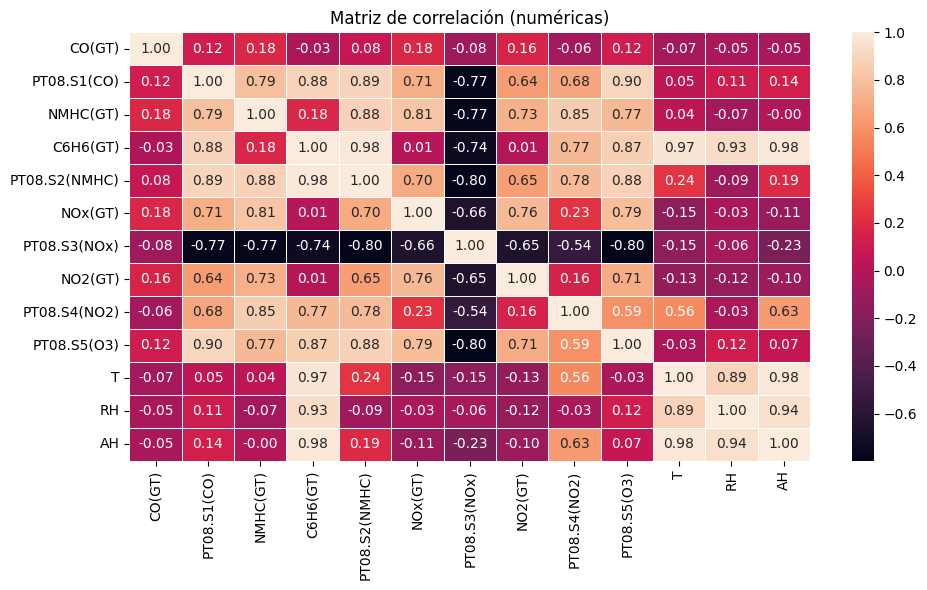

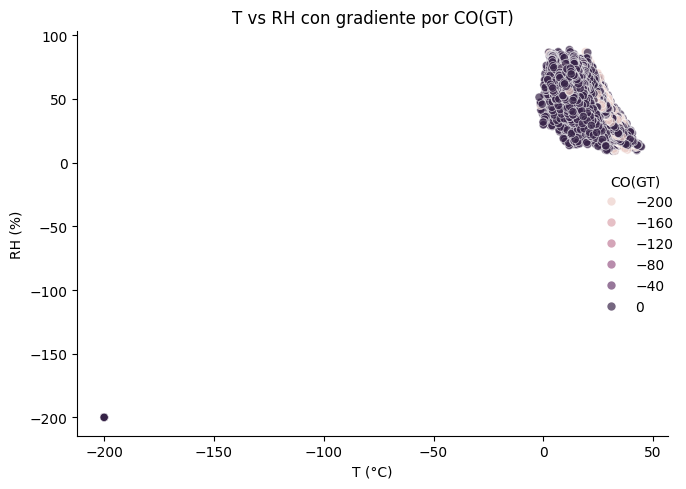

In [27]:

import seaborn as sns

corr = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación (numéricas)")
plt.tight_layout()
plt.show()

sns.relplot(data=df, x="T", y="RH", hue="CO(GT)", alpha=0.7, height=5, aspect=1.2)
plt.title("T vs RH con gradiente por CO(GT)")
plt.xlabel("T (°C)")
plt.ylabel("RH (%)")
plt.tight_layout()
plt.show()


**Interpretación:** El heatmap confirma co‑movimientos (NOx–NO2). El gráfico T–RH–CO sugiere concentración de CO en rangos intermedios de temperatura y humedad (H3 a explorar).



## Vinculación con preguntas e hipótesis

- **H1 (T vs CO):** evidencia de relación negativa débil.  
- **H2 (NOx vs NO2):** correlación positiva clara.  
- **H3 (Humedad):** patrones compatibles con efectos de RH/AH sobre concentraciones, a profundizar.



## Conclusiones

Se documentaron **abstract**, **hipótesis/preguntas**, **detección de faltantes**, y **visualizaciones** uni/bivariadas y multivariadas con interpretaciones. El dataset **Air Quality (UCI)** muestra regularidades consistentes con la literatura y brinda base para la siguiente parte del proyecto (análisis temporal y modelado).
